In [74]:
data <- read.csv("Forces3.csv")


In [148]:
ohe <- function(matrix,column){
    column <- matrix[,column]
    uniques <- unique(column)
    newmat <- matrix(0L, nrow = length(column), ncol = length(uniques))
    
    for(i in 1:length(column)){
        for(j in 1:length(uniques)){
            if(column[i] == uniques[j]){
                newmat[i,j] <- 1
            }
        }
    }
    return(newmat)
}

 
newdata1 <- ohe(data,4)
newdata2 <- ohe(data, 96)
newdata <- data[,-c(4,96)]
newdata <-cbind(newdata[,1:(length(newdata)-3)],newdata1,newdata2,newdata[,(length(newdata)-2):length(newdata)])


In [139]:
head(newdata)

predictor,predictor.1,predictor.2,predictor.4,predictor.5,predictor.6,predictor.7,predictor.8,predictor.9,predictor.10,⋯,8,9,10,1,2,3,4,response,response.1,response.2
3.0990676,30.31381,174.95122,301.3000,120.59317,83.08777,415.00031,268.28099,192.41076,322.61839,⋯,0,0,0,1,0,0,0,2374844,2413981,2163649
1.6074460,17.83223,212.20648,375.8420,322.19425,181.47235,43.18606,376.05755,218.38522,167.29391,⋯,0,0,0,0,1,0,0,3089828,3018491,2624279
4.8223026,39.69040,199.92759,151.1736,353.99259,409.27535,110.45469,347.65880,139.10210,98.51371,⋯,0,0,0,0,0,1,0,3081624,3026180,2927255
0.6624255,65.08108,175.86003,242.8898,344.70409,175.31207,293.16076,13.38025,55.84566,143.09287,⋯,0,0,0,0,0,1,0,2888558,2888175,2712369
1.5118722,78.65205,131.72239,250.1637,234.88369,308.42837,398.97123,27.92135,339.15265,258.99094,⋯,0,0,0,0,1,0,0,2488713,2494613,2189059
2.9704274,34.43013,55.45633,313.2747,67.20113,159.34171,159.69973,292.11862,237.76507,210.86941,⋯,0,0,0,0,0,0,1,2852205,2701549,2571480


In [724]:

index<-sample(1:length(newdata[,1]),
              round(length(newdata[,1])*.7),
              replace = FALSE)
train<- newdata[index,]
valtest<-newdata[-index,]
newindex<-sample(1:length(valtest[,1]),
                 round(length(valtest[,1])*.5),
                 replace = FALSE)
val<-valtest[newindex,]
test<-valtest[-newindex,]
for(i in 1:length(test)){
    test[,i]<-(test[,i] - min(train[,i]))/(
        max(train[,i]) - min(train[,i]))
}

for(i in 1:length(val)){
    val[,i]<-(val[,i] - min(train[,i]))/(
        max(train[,i]) - min(train[,i]))
}

for(i in 1:length(train)){
    train[,i]<-(train[,i] - min(train[,i]))/(
        max(train[,i]) - min(train[,i]))
}

    [1] "50619"  "59353"  "26757"  "19503"  "115558" "109473" "62990"  "73215" 
    [9] "107382" "9153"   "103310" "47271"  "16732"  "15075"  "103269" "25720" 
   [17] "62335"  "29500"  "41996"  "122174" "118019" "49044"  "3873"   "58540" 
   [25] "120736" "102318" "16574"  "117680" "60679"  "55911"  "114657" "114863"
   [33] "82597"  "94121"  "75693"  "575"    "83384"  "3115"   "51783"  "74869" 
   [41] "6269"   "91073"  "27060"  "83558"  "113483" "30101"  "77457"  "118722"
   [49] "107351" "80895"  "89186"  "108910" "116616" "101315" "34534"  "103093"
   [57] "126444" "85058"  "94242"  "86147"  "84411"  "12710"  "126300" "50155" 
   [65] "10968"  "43847"  "17453"  "113627" "8912"   "85775"  "88823"  "114627"
   [73] "29364"  "66958"  "49344"  "96579"  "38836"  "110089" "44239"  "122305"
   [81] "104038" "97746"  "91781"  "101322" "22564"  "43462"  "50275"  "54312" 
   [89] "124444" "79331"  "74388"  "75953"  "56588"  "80797"  "93447"  "117370"
   [97] "49818"  "104196" "105302" "4222

In [546]:

Ytrain <- train[,(ncol(train) - 2):ncol(train)]
Yval <- val[,(ncol(val) - 2):ncol(val)]
Ytest <- test[,(ncol(test) - 2):ncol(test)]

Xtrain <- train[,1:(ncol(train)-3)]
Xval <- val[,1:(ncol(val)-3)]
Xtest <- test[,1:(ncol(test)-3)]


,predictor,predictor.1,predictor.2,predictor.4,predictor.5,predictor.6,predictor.7,predictor.8,predictor.9,predictor.10,⋯,8,9,10,1,2,3,4,response,response.1,response.2
74270,0.2450715,0.03746366,0.62900460,0.01793052,0.4522459,0.51740028,0.36970023,0.6533002,0.7738873,0.2602673,⋯,0,0,0,0,1,0,0,0.3720319,0.4403826,0.4408109
104099,0.9710246,0.34750912,0.63021863,0.72305835,0.7596406,0.78482665,0.44910190,0.8352771,0.9683049,0.8470054,⋯,0,1,0,0,0,1,0,0.3609649,0.3501354,0.3802876
60480,0.4539761,0.59569977,0.01738071,0.53450428,0.6054788,0.59928411,0.41505937,0.9374135,0.6487471,0.3882170,⋯,0,0,1,0,0,0,1,0.3243721,0.3928046,0.3885373
44545,0.7730404,0.81244732,0.24859204,0.05124352,0.7246795,0.54818185,0.33063375,0.1515738,0.9497542,0.2675136,⋯,0,0,0,0,0,0,1,0.4114257,0.4167024,0.4870110
110436,0.8461115,0.54170513,0.24760123,0.06920450,0.8817362,0.69800446,0.07762778,0.5803590,0.9990785,0.6853909,⋯,0,1,0,1,0,0,0,0.2815780,0.3913058,0.3124563
48286,0.2884795,0.19220869,0.63887678,0.04814928,0.2152509,0.01599434,0.80619587,0.9151296,0.7720135,0.2521079,⋯,0,0,0,0,0,1,0,0.4313846,0.3427162,0.4630737


In [601]:
Phitrain <- as.matrix(cbind(rep(1,length(Xtrain[,1])),Xtrain,Xtrain^2))
Ytrain<-as.matrix(Ytrain)
Phival <- as.matrix(cbind(rep(1,length(Xval[,1])),Xval,Xval^2))
Yval <- as.matrix(Yval)
Phitest <- as.matrix(cbind(rep(1,length(Xtest[,1])),Xtest,Xtest^2))
Ytest <- as.matrix(Ytest)

In [606]:
w <- matrix(rnorm((1+2*length(Xtrain))*3)
            ,nrow = 1+2*length(Xtrain), ncol = 3)

In [607]:
wbest<-w
Errbest<-10000000000

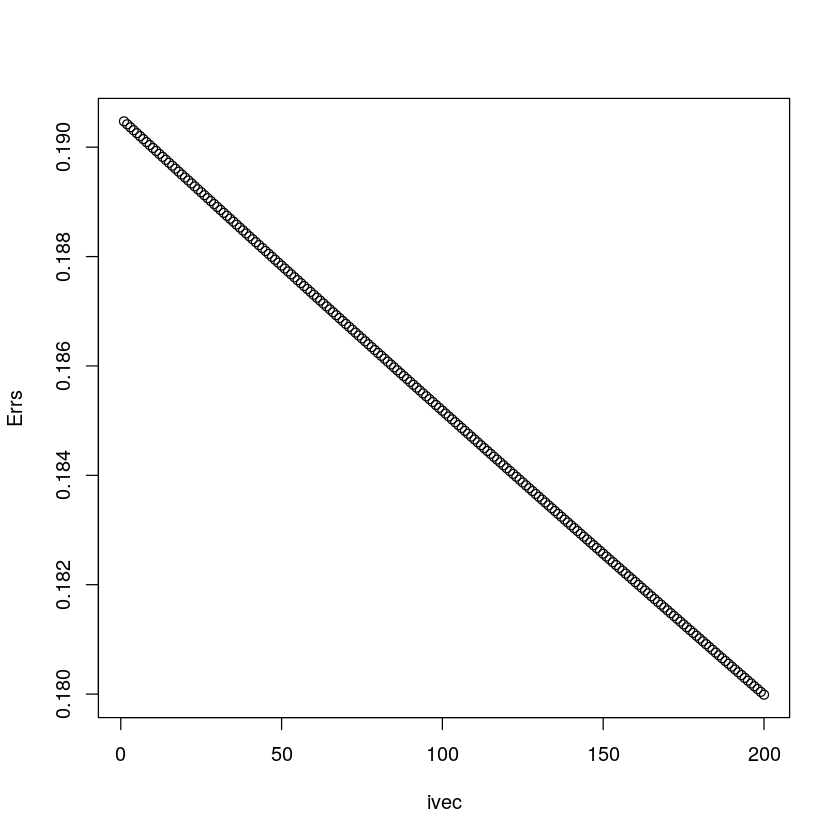

In [641]:

tr <- function (m){
  total_sum <- 0
  if(is.matrix(m))
    {
      row_count <- nrow(m)
      col_count <- ncol(m)
      if(row_count == col_count)
      {
        total_sum <-sum(diag(m))
        total_sum
      }
      else
      {
        message ('Matrix is not square')
      }
  }
  else
  {
    message( 'Object is not a matrix')

  }
}
Errs<-c()
ivec<-c()
w<-wbest
for(i in 1:200){
    w <- w - .00000061*t(Phitrain)%*%(
        Phitrain%*%w - Ytrain)
    Err<-tr(t(Yval - Phival%*%w)%*%(Yval - Phival%*%w))
    Errs<-c(Errs,Err)
    ivec<-c(ivec,i)
    if(Err<Errbest){
        wbest<-w
        Errbest<-Err
    }
}
plot(ivec,Errs)
write.csv(wbest,'x2w')

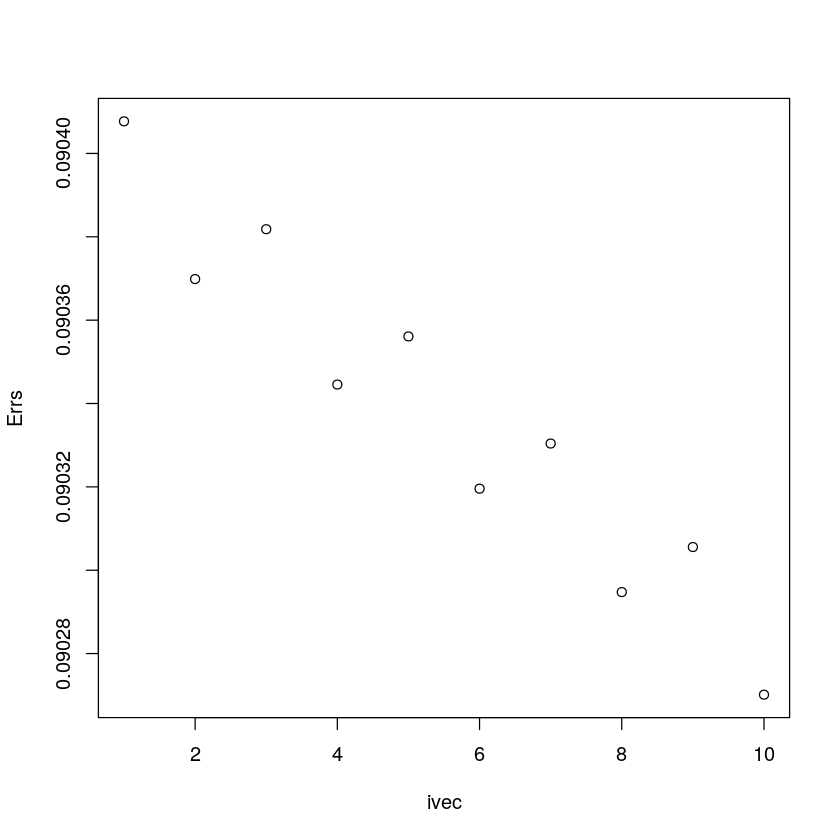

In [695]:
Errs<-c()
ivec<-c()
w<-wbest
for(i in 1:10){
    w <- w - .00000061*t(Phitrain)%*%(
        Phitrain%*%w - Ytrain) - .0000001*sign(w) - .00001*w
    Err<-tr(t(Yval - Phival%*%w)%*%(Yval - Phival%*%w))
    Errs<-c(Errs,Err)
    ivec<-c(ivec,i)
    if(Err<Errbest){
        wbest<-w
        Errbest<-Err
    }
}
plot(ivec,Errs)
write.csv(wbest,'x2wreg')

In [678]:
neww<-as.matrix(read.csv("xw", header = TRUE)[,2:4])
tr(t(wbest-neww)%*%(wbest-neww))
tr(t(Phival%*%neww - Yval)%*%(Phival%*%neww - Yval))

[1] 1.256428e-28

[1] 0.1251541

In [578]:
Phitrain <- as.matrix(cbind(rep(1,length(Xtrain[,1])),Xtrain))
Ytrain<-as.matrix(Ytrain)
Phival <- as.matrix(cbind(rep(1,length(Xval[,1])),Xval))
Yval <- as.matrix(Yval)
Phitest <- as.matrix(cbind(rep(1,length(Xtest[,1])),Xtest))
Ytest <- as.matrix(Ytest)

In [579]:
w <- matrix(rnorm((1+length(Xtrain))*3)
            ,nrow = 1+length(Xtrain), ncol = 3)

In [580]:
wbest <- w
Errbest <- 100000000000

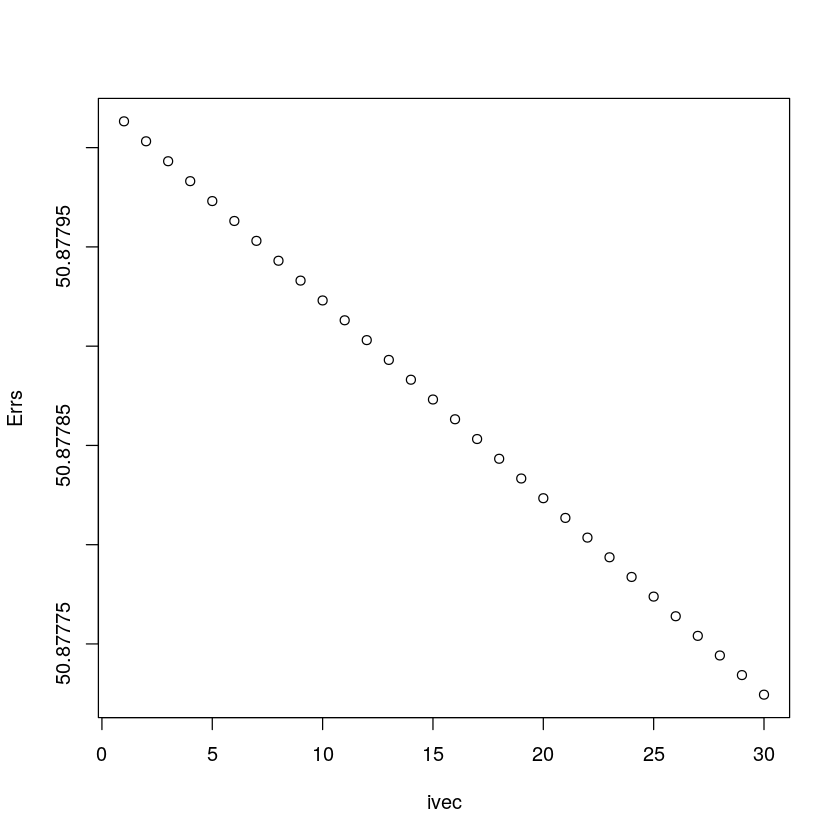

In [600]:
Errs<-c()
ivec<-c()
w<-wbest
for(i in 1:30){
    w <- w - .00000088*t(Phitrain)%*%(
        Phitrain%*%w - Ytrain)
    Err<-tr(t(Yval - Phival%*%w)%*%(Yval - Phival%*%w))
    Errs<-c(Errs,Err)
    ivec<-c(ivec,i)
    if(Err<Errbest){
        wbest<-w
        Errbest<-Err
    }
}
plot(ivec,Errs)
write.csv(wbest,"xw")

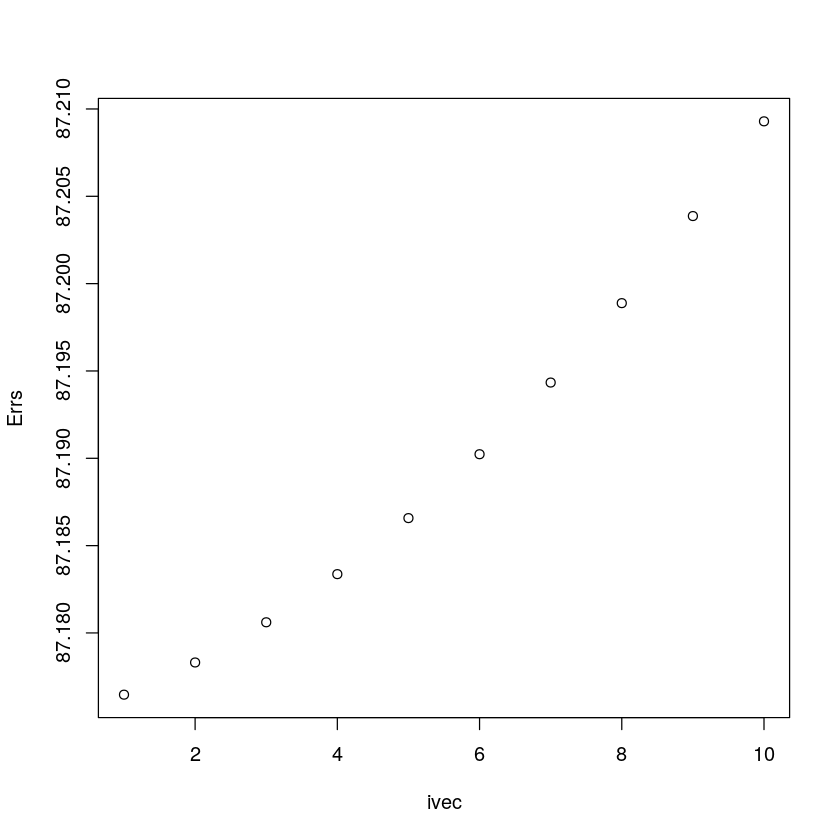

In [496]:
Errs<-c()
ivec<-c()
w<-wbest
for(i in 1:10){
    w <- w - .000000001*t(Phitrain)%*%(
        Phitrain%*%w - Ytrain) - .00000001*sign(w) - .0000001*w
    Err<-tr(t(Yval - Phival%*%w)%*%(Yval - Phival%*%w))
    Errs<-c(Errs,Err)
    ivec<-c(ivec,i)
    if(Err<Errbest){
        wbest<-w
        Errbest<-Err
    }
}
plot(ivec,Errs)

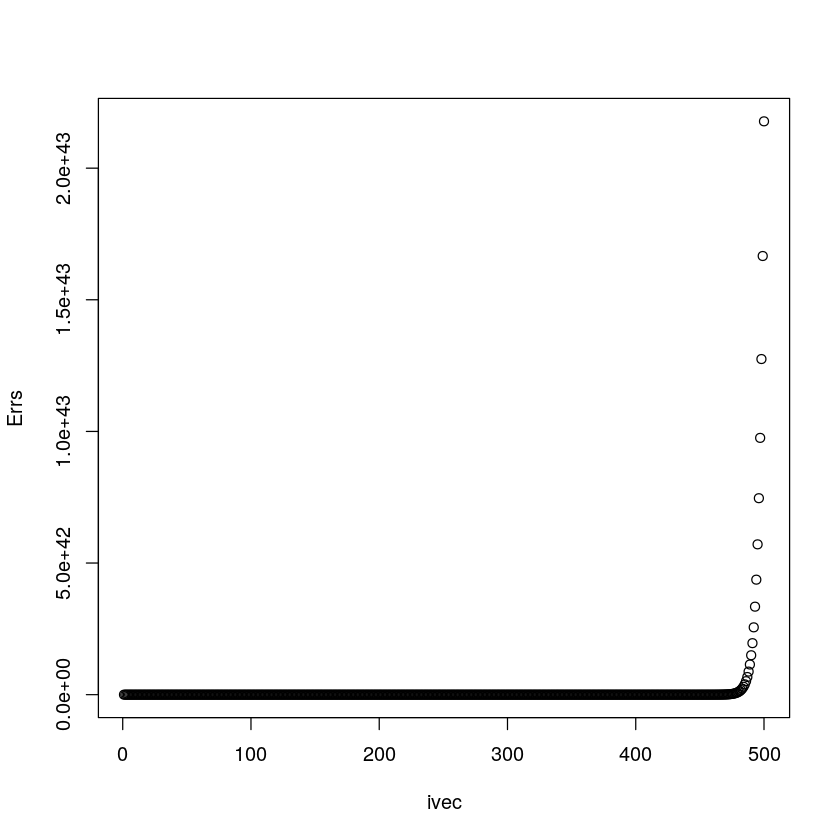

In [462]:
plot(ivec[2000:length(ivec)],Errs[2000:length(Errs)])

In [457]:
Errs[2000]

[1] 251.2566

In [633]:
median(abs((Yval - Phival%*%wbest)/Yval))

[1] 0.004846819

[1] 0.0283668

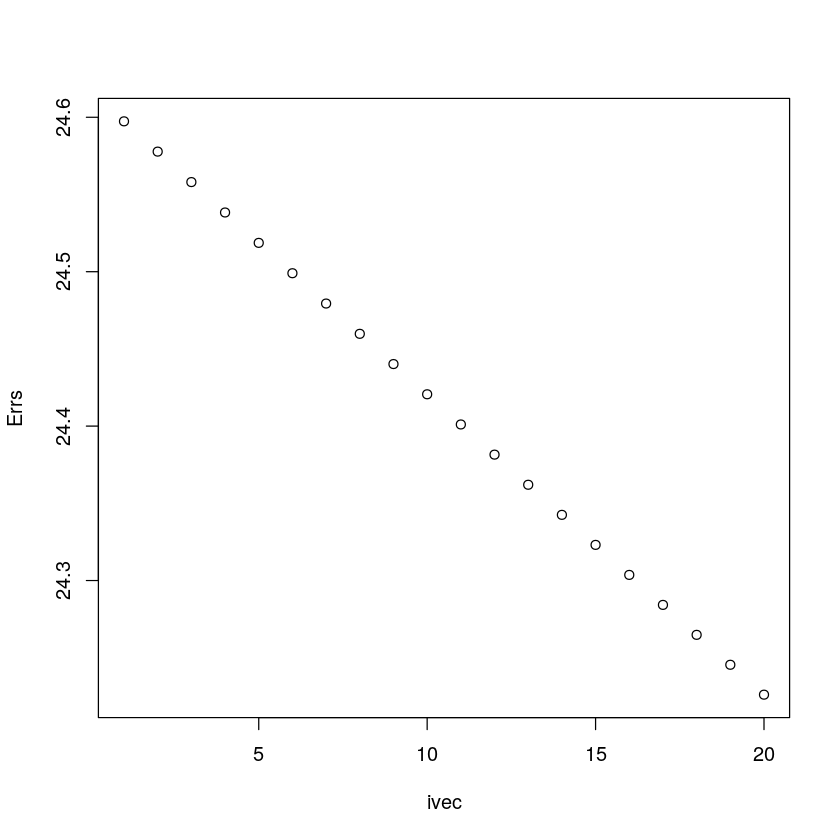

In [331]:
w2best <- w
Errs<-c()
ivec<-c()
for(i in 1:20){
    w2best <- w2best - .00000035*t(Phitrain)%*%(
        Phitrain%*%w2best - Ytrain) - .000001*sign(w2best) - .00000001*w2best
    Errs<-c(Errs,tr(t(
        Yval - Phival%*%w2best)%*%(
        Yval - Phival%*%w2best)))
    ivec<-c(ivec,i)
}
median(abs((Yval - Phival%*%w2best)/Yval))
plot(ivec,Errs)

[1] 0.004936554

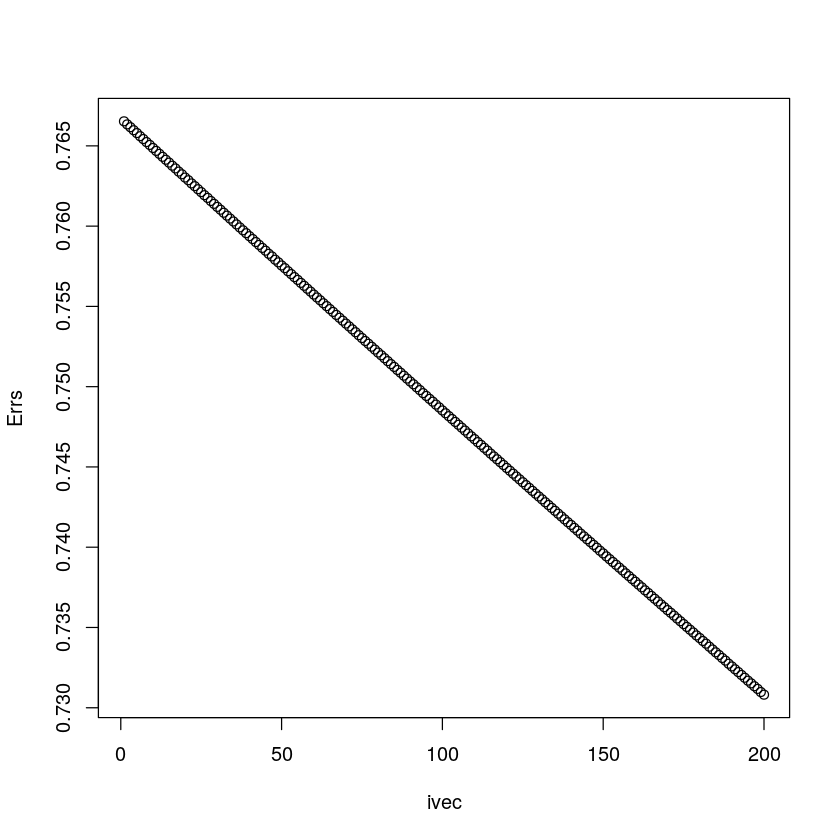

In [366]:
# w2best <- w
Errs<-c()
ivec<-c()
for(i in 1:200){
    w2best <- w2best - .00000035*t(Phitrain)%*%(
        Phitrain%*%w2best - Ytrain) - .000001*sign(w2best)
    Errs<-c(Errs,tr(t(
        Yval - Phival%*%w2best)%*%(
        Yval - Phival%*%w2best)))
    ivec<-c(ivec,i)
}
median(abs((Yval - Phival%*%w2best)/Yval))
plot(ivec,Errs)

In [710]:
png('Residual.png')
plot(Ytest[,1],(
    Phitest%*%wbest)[,1],
     xlab = "Truth",ylab = "Prediction", main = "Actual vs. Predicted", col = "black")
abline(0,1, col = "red", lwd = 2)
dev.off()
tr(t(Ytest - Phitest%*%wbest)%*%(Ytest - Phitest%*%wbest))

png 
  2

[1] 0.0904144

In [718]:
tr(t(Ytest - Phitest%*%wbest)%*%(Ytest - Phitest%*%wbest)) - tr(t(Yval - Phival%*%wbest)%*%(Yval - Phival%*%w))

[1] 0.0001442551

In [229]:
wbest <- w
Errbest <- Errs[200]

In [244]:
Errbest

[1] 187.7536

In [384]:
Phival%*%w2best - Yval

34478,0.028572753,0.042383195,0.017736645
103776,0.026814968,0.030743595,0.014211578
79158,0.034942998,0.055862988,0.049659573
31127,0.051529676,0.069314517,0.057224080
22798,0.026611807,0.024285552,0.014015915
82139,0.016464560,0.008743710,-0.007894691
27275,0.017954053,0.003886775,-0.020145131
115181,0.022793818,0.023429780,0.021943211
101200,0.034149476,0.033618942,0.023795692
128218,0.021946940,0.025277796,0.023366691
16257,0.025881605,0.032405995,0.035095492


In [716]:
xw <- as.matrix(read.csv("xw", header = TRUE)[,2:4])
newPhival <- as.matrix(cbind(rep(1,length(Xval[,1])),Xval))

In [717]:
png("xResidual.png")
plot(Yval[,1],(
    newPhival%*%xw)[,1],
     xlab = "Truth",ylab = "Prediction", main = "Actual vs. Predicted", col = "black")
abline(0,1, col = "red", lwd = 2)
dev.off()

png 
  2

In [ ]:
ohe()